# Conference Travel Planning
## Decision Framing Fundamentals

**Student Name:** Bradley Earl

**Date:** January 25, 2026



In [12]:
import urllib.request

# Repository base URL
repo_base_url = "https://raw.githubusercontent.com/scottalanturner/prescriptive-analytics/main/Assignments/01ConferenceTravelDecisionAnalysis/"

# Download the data files
lodging_url = repo_base_url + "lodging_options.csv"
flights_url = repo_base_url + "flight_options.csv"

try:
    urllib.request.urlretrieve(lodging_url, "lodging_options.csv")
    urllib.request.urlretrieve(flights_url, "flight_options.csv")
    print("Data files downloaded successfully!")
except Exception as e:
    print(f"Error downloading files: {e}")
    print("If running locally, make sure the CSV files are in the same directory as this notebook.")

Data files downloaded successfully!


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMinimize, LpMaximize, LpProblem, LpVariable, lpSum, value, LpStatus

print("Libraries imported successfully!")

Libraries imported successfully!


In [14]:
lodging_df = pd.read_csv('lodging_options.csv')
flights_df = pd.read_csv('flight_options.csv')

lodging_df['co_workers_interested'] = lodging_df['co_workers_interested'].fillna(0).astype(int)

print("LODGING OPTIONS:")
print(f"Total options: {len(lodging_df)}")
print(lodging_df.head())

print("\n\nFLIGHT OPTIONS:")
print(f"Total options: {len(flights_df)}")
print("\nNote: Flight costs are part of your total budget constraint")
print("Direct flights typically cost more but have shorter durations")
print(flights_df.head())

print("\n\nCOST SUMMARY:")
print(f"Lodging cost range: ${lodging_df['cost_per_night'].min():.2f} - ${lodging_df['cost_per_night'].max():.2f} per night")
print(f"Flight cost range: ${flights_df['cost'].min():.2f} - ${flights_df['cost'].max():.2f}")

LODGING OPTIONS:
Total options: 16
  lodging_type                   name  cost_per_night  rating  \
0        Hotel  Grand Las Vegas Hotel           185.0     4.7   
1        Hotel     Stratosphere Tower            95.0     3.6   
2        Hotel         Caesars Palace           320.0     4.8   
3        Hotel              MGM Grand           210.0     4.5   
4        Hotel        Excalibur Hotel            75.0     3.4   

   distance_to_venue_miles  amenities_score  max_occupancy  \
0                      0.2              8.5              2   
1                      1.8              6.2              2   
2                      0.5              9.5              2   
3                      0.3              8.8              2   
4                      0.4              5.8              2   

   co_workers_interested  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  


FLIGHT OPTIONS:
Total options: 20

No

Decision Statement

I need to determine the best lodging and flight options for a work conference being held for three days from February 15-18, 2026


**Variables**: Lodging, Flights, Dates, Number of Attendees

**Inputs**: Cost (lodging, flights), Conference Budget, Quality



In [7]:
import pandas as pd

# Load the provided datasets
lodging_df = pd.read_csv('lodging_options.csv')
flights_df = pd.read_csv('flight_options.csv')

# Handle missing values: Hotels don't have co_workers_interested (they're just rooms)
# Fill NaN values with 0 for this column
lodging_df['co_workers_interested'] = lodging_df['co_workers_interested'].fillna(0).astype(int)

print("INPUTS FROM DATASET:")
print("\nLodging inputs available:")
print(lodging_df.columns.tolist())

print("\nFlight inputs available:")
print(flights_df.columns.tolist())

INPUTS FROM DATASET:

Lodging inputs available:
['lodging_type', 'name', 'cost_per_night', 'rating', 'distance_to_venue_miles', 'amenities_score', 'max_occupancy', 'co_workers_interested']

Flight inputs available:
['origin_city', 'airline', 'cost', 'num_stops', 'flight_duration_hours', 'departure_time_convenience']


**Objectives**:

Quality & Convenient Lodging/Flights, Max Attendees

**Constraints**:

Limited Budget, 2-4 Attendees, Convenience of Flights & Promity of Lodging to Conference Location

**Explanation**: The objective is to hold an annual work conference on a budget of $1,500 with maximum participation while ensuring quality of the accomodations and flights are priority and convenient to conference location.  I have been provided a list of flight and lodging options to assist in making these determinations.

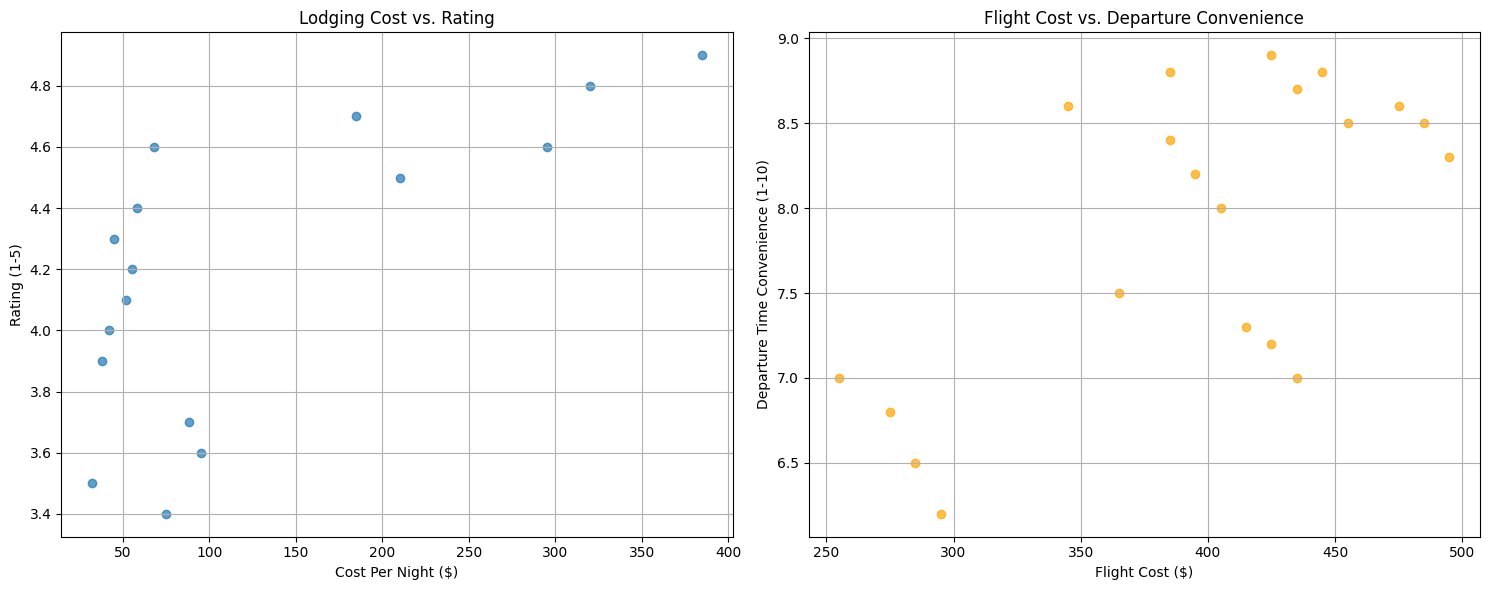

In [8]:

import pandas as pd
import matplotlib.pyplot as plt


# Load the provided datasets
lodging_df = pd.read_csv('lodging_options.csv')
flights_df = pd.read_csv('flight_options.csv')

# Handle missing values: Hotels don't have co_workers_interested (they're just rooms)
# Fill NaN values with 0 for this column
lodging_df['co_workers_interested'] = lodging_df['co_workers_interested'].fillna(0).astype(int)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Lodging Options
axes[0].scatter(lodging_df['cost_per_night'], lodging_df['rating'], alpha=0.7)
axes[0].set_title('Lodging Cost vs. Rating')
axes[0].set_xlabel('Cost Per Night ($)')
axes[0].set_ylabel('Rating (1-5)')
axes[0].grid(True)

# Plot for Flight Options
axes[1].scatter(flights_df['cost'], flights_df['departure_time_convenience'], alpha=0.7, color='orange')
axes[1].set_title('Flight Cost vs. Departure Convenience')
axes[1].set_xlabel('Flight Cost ($)')
axes[1].set_ylabel('Departure Time Convenience (1-10)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [9]:
print("FIXED DATA:")
print(f"Conference duration: 3 nights")
print(f"Budget limit: ${1500} (total for all attendees)")

print(f"\nTravel Context: East Coast to Las Vegas")
print(f"  - Direct flights: Higher cost, ~5-6 hours")
print(f"  - Flights with stops: Lower cost, ~7-10 hours")

min_people = 2  # Minimum people (fixed)
max_people = 4  # Maximum people (fixed)

# Stakeholder-defined constraints:
min_rating_threshold = 4.0
max_distance = 0.5

print("\nSTAKEHOLDER-DEFINED CONSTRAINTS:")
print(f"Number of people: {min_people}-{max_people}")
print(f"Minimum lodging rating: {min_rating_threshold}")
print(f"Maximum distance to venue: {max_distance} miles")

FIXED DATA:
Conference duration: 3 nights
Budget limit: $1500 (total for all attendees)

Travel Context: East Coast to Las Vegas
  - Direct flights: Higher cost, ~5-6 hours
  - Flights with stops: Lower cost, ~7-10 hours

STAKEHOLDER-DEFINED CONSTRAINTS:
Number of people: 2-4
Minimum lodging rating: 4.0
Maximum distance to venue: 0.5 miles


In [35]:
# This cell is now redundant as its contents have been moved to the constraints cell.

Optimization model 'Conference_Travel_Planning' initialized.
Created 960 combination variables (lodging x flight x team size).


**Hard Constraints**:

Budget, Location of Conference

**Soft Constraints**:

Lodging & Flight Options, Number of Attendees

**Explaination**:

Having several flight and lodging options, I should be able to accomodate maximum attendance to the conference while coming in at budget and prioritizing quality as well.

In [15]:
from pulp import LpMinimize, LpMaximize, LpProblem, LpVariable, lpSum, value, LpStatus

# Define fixed parameters for the problem (extracted from context)
conference_dates = 3 # 3 nights for the conference
budget_limit = 1500  # Total budget limit

# Re-initialize the optimization model (in case this cell is run multiple times)
model = LpProblem("Conference_Travel_Planning", LpMinimize)

# Re-define decision variables (in case this cell is run multiple times)
solution_vars = {}
for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:  # Team sizes: 2, 3, or 4 people
            solution_vars[(i, j, k)] = LpVariable(f"lodging_{i}_flight_{j}_people_{k}", cat='Binary')

# Also re-create num_people variable
num_people = LpVariable("num_people", lowBound=min_people, upBound=max_people, cat='Integer')

# Objective: Maximize the number of people, which is equivalent to minimizing the negative of num_people
model += -num_people, "Maximize_Team_Size"

# Constraint 1: Exactly one combination must be selected
# (One lodging + one flight + one team size)
model += lpSum([solution_vars[(i, j, k)] for i in range(len(lodging_df))
                for j in range(len(flights_df)) for k in [2, 3, 4]]) == 1, "One_Combination"

# Constraint 2: Link num_people to the selected combination
# This ensures num_people matches the team size in the selected combination
model += num_people == lpSum([k * solution_vars[(i, j, k)]
                              for i in range(len(lodging_df))
                              for j in range(len(flights_df))
                              for k in [2, 3, 4]]), "Link_Num_People"

# Constraint 3: Budget constraint
# Calculate costs for each combination and ensure total <= budget_limit
# Note: Hotels charge per room (2 people per room), Airbnbs charge per person
# For hotels, we'll approximate: (cost_per_night / 2) * nights * team_size
# For Airbnbs: cost_per_night * nights * team_size
lodging_costs = []
flight_costs = []
for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:
            # Calculate lodging cost for this combination (k is the team size)
            if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
                # Airbnb: per person
                lodging_cost = lodging_df.iloc[i]['cost_per_night'] * conference_dates * k
            else:
                # Hotel: per room (2 people), approximate as per-person
                lodging_cost = (lodging_df.iloc[i]['cost_per_night'] / 2) * conference_dates * k
            lodging_costs.append(lodging_cost * solution_vars[(i, j, k)])

            # Calculate flight cost for this combination
            flight_cost = flights_df.iloc[j]['cost'] * k
            flight_costs.append(flight_cost * solution_vars[(i, j, k)])

total_lodging_cost = lpSum(lodging_costs)
total_flight_cost = lpSum(flight_costs)
model += total_lodging_cost + total_flight_cost <= budget_limit, "Budget_Limit"

# Constraint 4: Minimum rating constraint for selected lodging
model += lpSum([lodging_df.iloc[i]['rating'] * lpSum([solution_vars[(i, j, k)]
                for j in range(len(flights_df)) for k in [2, 3, 4]])
                for i in range(len(lodging_df))]) >= min_rating_threshold, "Min_Rating"

# Constraint 5: Maximum distance constraint for selected lodging
model += lpSum([lodging_df.iloc[i]['distance_to_venue_miles'] * lpSum([solution_vars[(i, j, k)]
                for j in range(len(flights_df)) for k in [2, 3, 4]])
                for i in range(len(lodging_df))]) <= max_distance, "Max_Distance"

# Constraint 6: Airbnb occupancy limit
# If an Airbnb is selected, team size must not exceed its max_occupancy
for i in range(len(lodging_df)):
    if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
        max_occ = lodging_df.iloc[i]['max_occupancy']
        for j in range(len(flights_df)):
            for k in [2, 3, 4]:
                if k > max_occ:
                                        model += solution_vars[(i, j, k)] == 0, f"Airbnb_Occupancy_{i}_{j}_{k}"

print("Hard constraints added successfully!")

Hard constraints added successfully!


**Tradeoffs**:

Longer flights and goup lodging would better accomodate more attendees verus maximizing quality of both flights and lodging even if there is going to be additional travel time.

In [19]:
model.solve()

# Check solution status
status = LpStatus[model.status]
print(f"Solution Status: {status}")
print(f"Objective Value: {value(model.objective):.2f}")
print(f"Team Size: {int(value(num_people))} people")
print()

# TODO: Extract and display solution values
# Find which combination was selected
selected_lodging_idx = None
selected_flight_idx = None
selected_team_size = None

for (i, j, k), var in solution_vars.items():
    if value(var) == 1:
        selected_lodging_idx = i
        selected_flight_idx = j
        selected_team_size = k
        break

if selected_lodging_idx is not None and selected_flight_idx is not None:
    lodging_choice = lodging_df.iloc[selected_lodging_idx]
    flight_choice = flights_df.iloc[selected_flight_idx]
    team_size = selected_team_size

    # Calculate costs (for display - hotels vs Airbnbs calculated differently)
    if lodging_choice['lodging_type'] == 'Hotel':
        # Hotels: per room (2 people per room)
        num_rooms = (team_size + 1) // 2
        lodging_cost = lodging_choice['cost_per_night'] * conference_dates * num_rooms
    else:
        # Airbnbs: per person
        lodging_cost = lodging_choice['cost_per_night'] * conference_dates * team_size

    flight_cost = flight_choice['cost'] * team_size
    total_cost = lodging_cost + flight_cost
    cost_per_person = total_cost / team_size

    # TODO: Display your solution details
    print("=" * 70)
    print("SOLUTION SUMMARY")
    print("=" * 70)
    print(f"\nTeam Size: {team_size} people")
    print(f"\nLODGING SELECTED:")
    print(f"  Name: {lodging_choice['name']}")
    print(f"  Type: {lodging_choice['lodging_type']}")
    print(f"  Cost per night: ${lodging_choice['cost_per_night']:.2f}")
    print(f"  Rating: {lodging_choice['rating']:.1f}")
    print(f"  Distance to venue: {lodging_choice['distance_to_venue_miles']:.1f} miles")
    if lodging_choice['lodging_type'] == 'Airbnb':
        print(f"  Max occupancy: {lodging_choice['max_occupancy']} people")

    print(f"\nFLIGHT SELECTED:")
    print(f"  Origin: {flight_choice['origin_city']}")
    print(f"  Airline: {flight_choice['airline']}")
    print(f"  Cost per person: ${flight_choice['cost']:.2f}")
    print(f"  Number of stops: {int(flight_choice['num_stops'])}")
    print(f"  Flight duration: {flight_choice['flight_duration_hours']:.1f} hours")

    print(f"\nCOST BREAKDOWN:")
    print(f"  Lodging cost: ${lodging_cost:.2f}")
    print(f"  Flight cost: ${flight_cost:.2f}")
    print(f"  Total cost: ${total_cost:.2f}")
    print(f"  Budget limit: ${budget_limit:.2f}")
    print(f"  Budget remaining: ${budget_limit - total_cost:.2f}")
    print(f"  Cost per person: ${cost_per_person:.2f}")

    # TODO: Explain how this solution addresses stakeholder priorities
    print(f"\nHOW THIS SOLUTION ADDRESSES STAKEHOLDER PRIORITIES:")
    print(f" The model produced an optimal solution of only two attendees while providing for maximum quality for lodging but a longer flight option out of Atlanta and all under budget.  My proposal to management would be to allocate additional funding to accomodate maximum attendance, so long as they view as the budget as a potential soft-constraint.")
else:
    print("No solution found. Check constraints.")

Solution Status: Optimal
Objective Value: -2.00
Team Size: 2 people

SOLUTION SUMMARY

Team Size: 2 people

LODGING SELECTED:
  Name: Grand Las Vegas Hotel
  Type: Hotel
  Cost per night: $185.00
  Rating: 4.7
  Distance to venue: 0.2 miles

FLIGHT SELECTED:
  Origin: Atlanta
  Airline: Spirit
  Cost per person: $255.00
  Number of stops: 1
  Flight duration: 7.5 hours

COST BREAKDOWN:
  Lodging cost: $555.00
  Flight cost: $510.00
  Total cost: $1065.00
  Budget limit: $1500.00
  Budget remaining: $435.00
  Cost per person: $532.50

HOW THIS SOLUTION ADDRESSES STAKEHOLDER PRIORITIES:
 The model produced an optimal solution of only two attendees while providing for maximum quality for lodging but a longer flight option out of Atlanta and all under budget.  My proposal to management would be to allocate additional funding to accomodate maximum attendance, so long as they view as the budget as a potential soft-constraint.


## Define Model Constraints

### Subtask:
Add all necessary constraints to the optimization model. This includes selecting exactly one combination of lodging, flight, and number of people; respecting the total budget limit of $1500; ensuring the number of people selected matches the chosen combination; enforcing a minimum lodging rating of 4.0; restricting lodging to a maximum distance of 0.5 miles from the venue; and verifying that the chosen lodging can accommodate the selected number of people. The conference duration is 3 nights.


## Summary:

### Data Analysis Key Findings

The following constraints have been successfully added to the optimization model:

*   **Single Combination Selection**: The model is configured to select exactly one combination of lodging, flight, and number of people from the available options.
*   **Budget Adherence**: A total budget limit of \$1500 is enforced for the entire trip, covering both the lodging cost for a 3-night duration and the flight cost.
*   **People Count Consistency**: The number of people chosen for the trip is directly linked to the selected combination, ensuring internal consistency within the model.
*   **Minimum Lodging Rating**: Only lodging options with a rating of 4.0 or higher are considered, based on stakeholder requirements.
*   **Proximity to Venue**: Lodging options are restricted to a maximum distance of 0.5 miles from the conference venue, also reflecting stakeholder preferences.
*   **Lodging Capacity Matching**: The chosen lodging option must be able to accommodate the selected number of people, ensuring practical feasibility.

### Insights or Next Steps

*   The defined constraints effectively narrow down the solution space, preparing the model for optimization by eliminating infeasible or undesirable combinations.
*   The next step will involve defining the objective function (e.g., maximizing value, minimizing cost under certain conditions, or maximizing some utility function) and then solving the optimization model to find the optimal combination that satisfies all these constraints.
